In [1]:
import graficas as g
import entropia as en
import matplotlib.pyplot as plt
import numpy as np
import time
import importlib

In [2]:
importlib.reload(en)

<module 'entropia' from 'C:\\proyectos\\repositorios\\pt_robustez\\entropia.py'>

In [3]:
dark_blue = "#0e3d66"
dark_orange = "#cc6600"

In [4]:
num_simulaciones = 50
n=1000
m=15

In [5]:
matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    entropia_BA = []
    entropia_WS = []

    N = len(G_BA)
    
    for i in range(N):
        entropia_BA.append(en.entropia_shanon_1(G_BA))
        entropia_WS.append(en.entropia_shanon_1(G_WS))

        G_BA,_ = g.ataques(G_BA,'random')
        G_WS,_ = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(entropia_BA)
    matriz_WS_fallos.append(entropia_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

El tiempo de ejecución fue de: 111.95169711112976


In [7]:
matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    entropia_BA = []
    entropia_WS = []

    N = len(G_BA)
    
    for i in range(N):
        entropia_BA.append(en.entropia_shanon_1(G_BA))
        entropia_WS.append(en.entropia_shanon_1(G_WS))

        G_BA,_ = g.ataques(G_BA,'degree')
        G_WS,_ = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(entropia_BA)
    matriz_WS_ataques.append(entropia_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

El tiempo de ejecución fue de: 204.33697056770325


In [8]:
resultados_BA_fallos_H_1 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_WS_fallos_H_1 = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_BA_ataques_H_1 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_WS_ataques_H_1 = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]


In [9]:
matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    entropia_BA = []
    entropia_WS = []

    N = len(G_BA)
    
    for i in range(N):
        entropia_BA.append(en.entropia_shanon_2(G_BA))
        entropia_WS.append(en.entropia_shanon_2(G_WS))

        G_BA,_ = g.ataques(G_BA,'random')
        G_WS,_ = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(entropia_BA)
    matriz_WS_fallos.append(entropia_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

El tiempo de ejecución fue de: 81.97705149650574


In [10]:
matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    entropia_BA = []
    entropia_WS = []

    N = len(G_BA)
    
    for i in range(N):
        entropia_BA.append(en.entropia_shanon_2(G_BA))
        entropia_WS.append(en.entropia_shanon_2(G_WS))

        G_BA,_ = g.ataques(G_BA,'degree')
        G_WS,_ = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(entropia_BA)
    matriz_WS_ataques.append(entropia_WS)

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

El tiempo de ejecución fue de: 128.80320620536804


In [11]:
resultados_BA_fallos_H_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_WS_fallos_H_2 = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_BA_ataques_H_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_WS_ataques_H_2 = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]


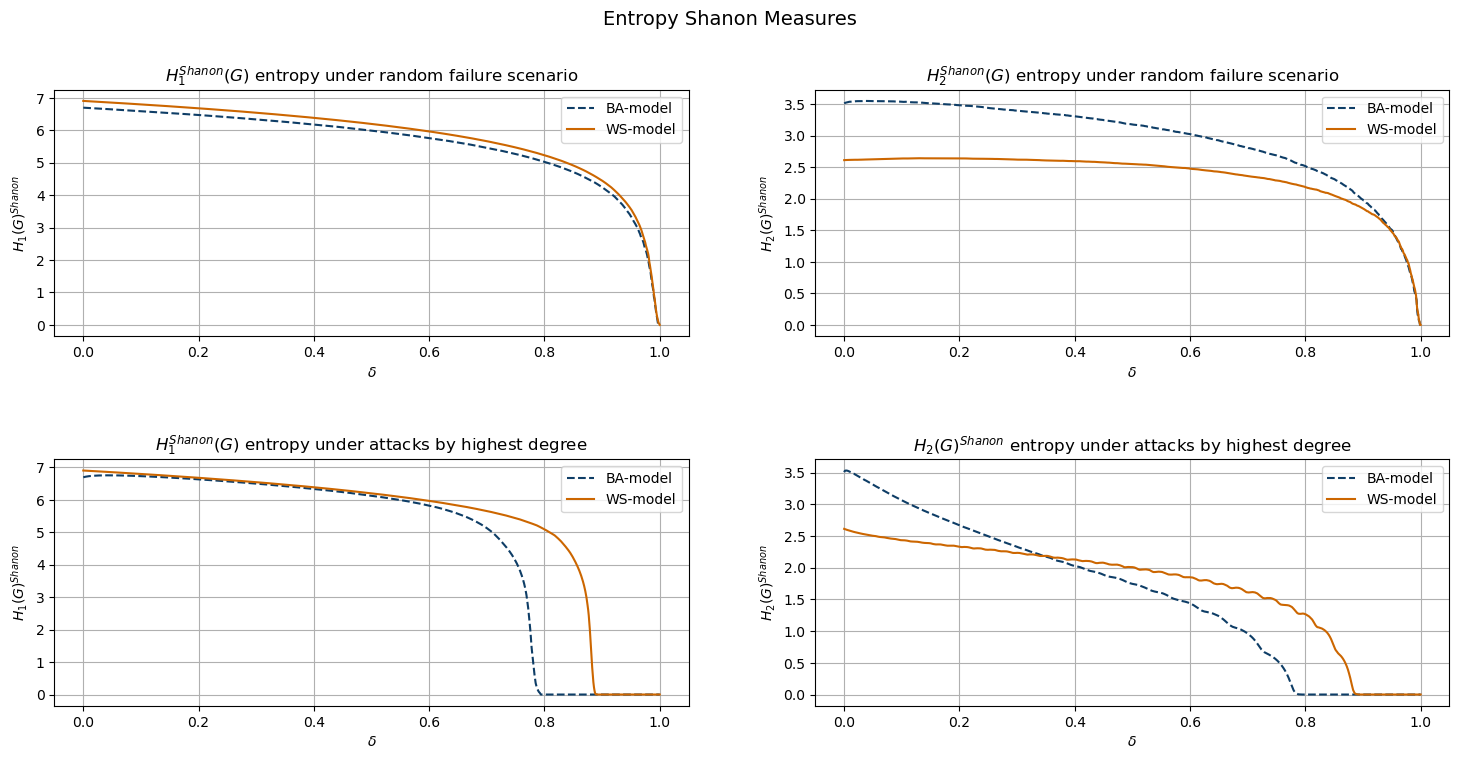

In [16]:
x = np.linspace(0, 1, len(resultados_BA_fallos_H_2))

fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True, sharey=False)

# ----------- H1 -----------
# Fila 1: Fallos
axs[0, 0].plot(x, resultados_BA_fallos_H_1, label='BA-model', linestyle='--', color=dark_blue)
axs[0, 0].plot(x, resultados_WS_fallos_H_1, label='WS-model', color=dark_orange)
axs[0, 0].set_title(r'$H_1^{Shanon}(G)$ entropy under random failure scenario')
axs[0, 0].set_ylabel(r'$H_1(G)^{Shanon}$')
axs[0, 0].legend(loc='best')
axs[0, 0].grid(True)
axs[0, 0].set_xlabel(r'$\delta$')

# Fila 2: Ataques
axs[1, 0].plot(x, resultados_BA_ataques_H_1, label='BA-model', linestyle='--', color=dark_blue)
axs[1, 0].plot(x, resultados_WS_ataques_H_1, label='WS-model', color=dark_orange)
axs[1, 0].set_title(r'$H_1^{Shanon}(G)$ entropy under attacks by highest degree')
axs[1, 0].set_ylabel(r'$H_1(G)^{Shanon}$')
axs[1, 0].legend(loc='best')
axs[1, 0].grid(True)
axs[1, 0].set_xlabel(r'$\delta$')

# ----------- H2 -----------
# Fila 1: Fallos
axs[0, 1].plot(x, resultados_BA_fallos_H_2, label='BA-model', linestyle='--', color=dark_blue)
axs[0, 1].plot(x, resultados_WS_fallos_H_2, label='WS-model', color=dark_orange)
axs[0, 1].set_title(r'$H_2^{Shanon}(G)$ entropy under random failure scenario')
axs[0, 1].set_xlabel(r'$\delta$')
axs[0, 1].set_ylabel(r'$H_2(G)^{Shanon}$')
axs[0, 1].legend(loc='best')
axs[0, 1].grid(True)

# Fila 2: Ataques
axs[1, 1].plot(x, resultados_BA_ataques_H_2, label='BA-model', linestyle='--', color=dark_blue)
axs[1, 1].plot(x, resultados_WS_ataques_H_2, label='WS-model', color=dark_orange)
axs[1, 1].set_title(r'$H_2(G)^{Shanon}$ entropy under attacks by highest degree')
axs[1, 1].set_xlabel(r'$\delta$')
axs[1, 1].set_ylabel(r'$H_2(G)^{Shanon}$')
axs[1, 1].legend(loc='best')
axs[1, 1].grid(True)

# Ajustes finales
axs[0, 0].tick_params(labelbottom=True)
axs[0, 1].tick_params(labelbottom=True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Entropy Shanon Measures", fontsize=14)
plt.savefig("medidas de entropia de shanon.png", dpi=300)
plt.show()